# Przekształcenia punktowe

W trakcie niniejszego ćwiczenia zapoznamy się z podstawowymi operacjami punktowymi (bezkontekstowymi) przeprowadzanymi na obrazach cyfrowych:
- typu LUT (operacja jednoargumentowa),
- arytmetycznymi (operacje dwuargumentowe): dodawanie, odejmowanie, mnożenie, dzielenie,
- logicznymi (operacje jedno i dwuargumentowe): AND, OR, XOR, NOT.

Na początku zaimportuj potrzebne biblioteki.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Operacja LUT

**Operacja LUT** polega na przekształcaniu wartości poszczególnych pikseli obrazu przy użyciu z góry przygotowanych tabel przekodowań (tabel korekcji).

W przetwarzaniu obrazów najczęściej wykorzystuje się następujące funkcje:
- typu kwadratowa, pierwiastek kwadratowy
- typu logarytm, odwrócony logarytm
- typu wykładnicza,
- inne (np. piłokształtna).

W tym zadaniu zostały dla Państwa przygotowane tablice przekodowania.
Proszę pobrać je z githuba `https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py` (można użyć znanego polecenia !wget), a następnie zaimportować je poleceniem `import lut`.
Od tego momentu można się do nich odwoływać w następujący sposób: `lut.log` itd.

In [ ]:
!wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py

--2021-11-20 21:22:34--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10330 (10K) [text/plain]
Saving to: ‘lut.py’

lut.py              100%[===================>]  10.09K  --.-KB/s    in 0s      

2021-11-20 21:22:34 (90.6 MB/s) - ‘lut.py’ saved [10330/10330]



In [ ]:
import lut

Wyświetl przykładowe przekodowanie wykorzystując funkcję `plt.plot(lut.kwadratowa)`.

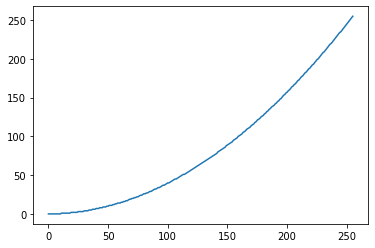

In [ ]:
plt.plot(lut.kwadratowa)

Wybierz jeden z obrazów: _lena.bmp_ lub _jet.bmp_ (w razie potrzeby pobierz go z githuba):
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

Wczytaj go i wyświetl.

In [ ]:
!wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp

--2021-11-20 21:22:35--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66616 (65K) [image/bmp]
Saving to: ‘lena.bmp’

lena.bmp            100%[===================>]  65.05K  --.-KB/s    in 0.005s  

2021-11-20 21:22:35 (11.7 MB/s) - ‘lena.bmp’ saved [66616/66616]



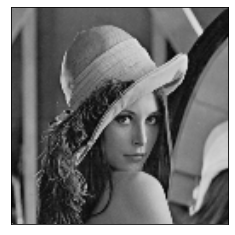

In [ ]:
I = cv2.imread('lena.bmp')

# Matplotlib display
plt.imshow(I)
plt.xticks([]), plt.yticks([])  
plt.show()

Na wybranym obrazie wykonaj operację LUT.
Służy do tego funkcja `cv2.LUT` przyjmująca dwa argumenty: obraz oraz tablicę przekodowania.
Wybierz dowolną z zaimportowanych tablic i wyświetl wynikowy obraz.

In [ ]:
I_kwadratowa = cv2.LUT(I, lut.kwadratowa)

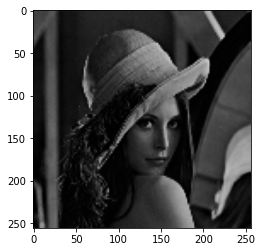

In [ ]:
plt.imshow(I_kwadratowa)

In [ ]:
I_wykladnicza = cv2.LUT(I, lut.wykladnicza)

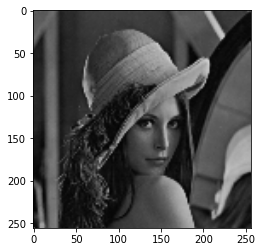

In [ ]:
plt.imshow(I_wykladnicza)

Aby lepiej zobaczyć w jaki sposób działają różne przekodowania LUT, skonstruujemy funkcję, która jako argumenty pobierać będzie obrazek oryginalny oraz tablicę przekodowania, a następnie na wspólnym rysunku będzie wyświetlać: funkcję, obraz wejściowy oraz wynik przekodowania.

Przypomnienie składni tworzenia funkcji w pythonie:
```{python}
  def nazwa_funkcji(para, metry):
  	# cialo funkcji
```

  - Stwórz nową funkcję i nazwij ją LUT.
  - Funkcja powinna przyjmować dwa parametry: obraz oraz tablicę przekodowania.
  - W ciele funkcji wykonaj przekodowanie LUT, podobnie jak wcześniej w przykładzie.
  - Funkcja powinna wyświetlić wykres składający się z 3 umieszczonych obok siebie pól: wykres przekodowania, obraz oryginalny oraz obraz przekształcony.
    Każdy z wykresów powinien być podpisany.
    _(W razie problemów można przypomnieć sobie te zagadnienia z laboratorium wprowadzającego)_
  - Jeśli wykres przekodowania jest zbyt rozciągnięty, można go wyrównać, np. `ax2.set_aspect('equal')`.

In [ ]:
def LUT(image, table):
  new_image = cv2.LUT(image, table)
  f, (ax1,ax2,ax3) = plt.subplots(1,3)
  ax1.set_title('plot')
  ax1.set_aspect('equal')
  ax1.plot(table)
  ax2.set_title('original')
  ax2.imshow(image)
  ax3.set_title('modified')
  ax3.imshow(new_image)
  plt.show()

Wywołaj przygotowaną funkcję dla każdego z przekształceń.
W wyniku powinno powstać 7 wykresów.

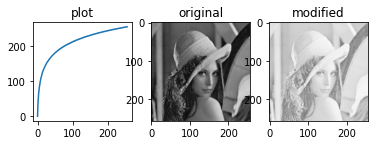

In [ ]:
LUT(I,lut.log)

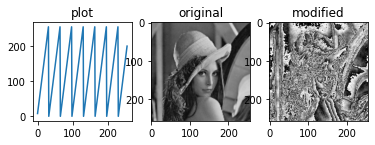

In [ ]:
LUT(I,lut.pila)

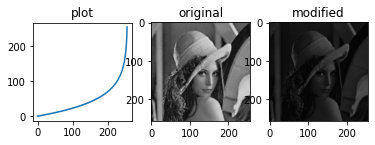

In [ ]:
LUT(I,lut.odwlog)

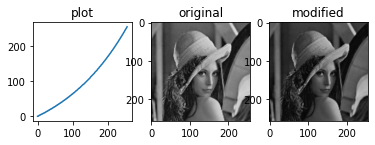

In [ ]:
LUT(I,lut.wykladnicza)

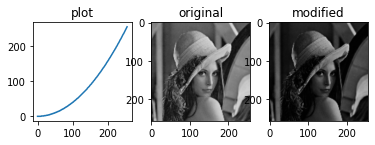

In [ ]:
LUT(I,lut.kwadratowa)

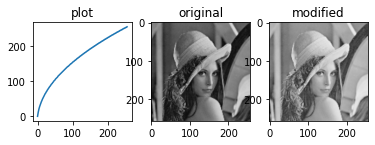

In [ ]:
LUT(I,lut.pierwiastkowa)

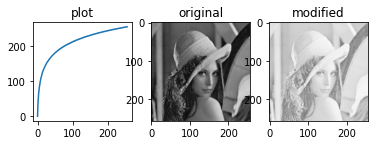

In [ ]:
LUT(I,lut.log)

## Operacja arytmetyczne

### Dodawanie

Wczytaj dwa obrazy _lena.bmp_ i _jet.bmp_ i wyświetl je.

In [ ]:
!wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
!wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

--2021-11-20 21:22:38--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66616 (65K) [image/bmp]
Saving to: ‘lena.bmp.1’

lena.bmp.1          100%[===================>]  65.05K  --.-KB/s    in 0.009s  

2021-11-20 21:22:38 (6.99 MB/s) - ‘lena.bmp.1’ saved [66616/66616]

--2021-11-20 21:22:38--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66616 (65K) [image/bmp]
Saving to: ‘jet

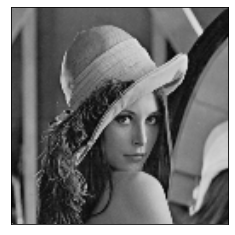

In [ ]:
lena = cv2.imread('lena.bmp')
plt.imshow(lena)
plt.xticks([]), plt.yticks([])  
plt.show()

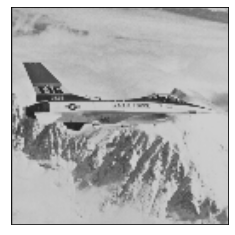

In [ ]:
jet = cv2.imread('jet.bmp')
plt.imshow(jet)
plt.xticks([]), plt.yticks([])  
plt.show()

Dodaj obrazy _lena_ i _jet_, wykorzystaj funkcję `cv2.add`.
Uzyskany wynik wyświetl.

In [ ]:
res = cv2.add(jet,lena)

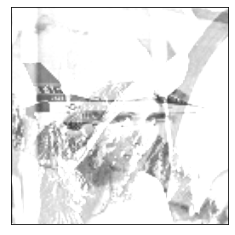

In [ ]:
plt.imshow(res)
plt.xticks([]), plt.yticks([])  
plt.show()

Czy wynik sumowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Spróbuj wykonać dodawanie ponownie wykorzystując typ uint16 (`jet.astype('uint16')`).
Wynikowy obraz należy przeskalować do zakresu 0-255, zamienić na typ uint8 i wyświetlić. _
Uwaga: operacja ta jest użyteczna w przypadku, gdy dane do wyświetlenia wykraczają poza zakres 0-255, w przeciwnym przypadku jej wykorzystanie może zniekształcić wyniki._

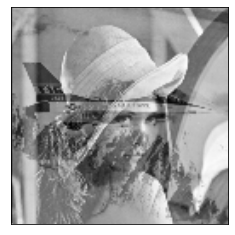

In [ ]:
res = cv2.add(jet.astype('uint16'),lena.astype('uint16'))
res = ((res - res.min()) * (1/(res.max() - res.min()) * 255))
plt.imshow(res.astype('uint8'))
plt.xticks([]), plt.yticks([])  
plt.show()

### Kombinacja liniowa

Do wykonywania operacji kombinacji liniowej służy funkcja `cv2.addWeighted`.
Zapoznaj się z dokumentacją tej funkcji i przetestuj kilka kombinacji liniowych obrazów _lena_ i _jet_.
Wyświetl wynik dowolnej z nich.

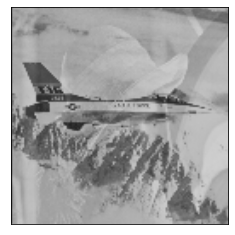

In [ ]:
res = cv2.addWeighted(lena, 0.2, jet, 0.8, 0)
plt.imshow(res.astype('uint8'))
plt.xticks([]), plt.yticks([])  
plt.show()

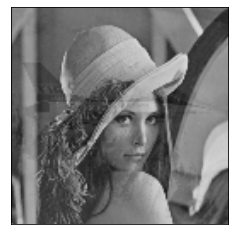

In [ ]:
res = cv2.addWeighted(lena, 0.8, jet, 0.2, 0)
plt.imshow(res.astype('uint8'))
plt.xticks([]), plt.yticks([])  
plt.show()

### Odejmowanie

Wykorzystując funkcję `cv2.subtract` odejmij obrazy _lena_ i _jet_.

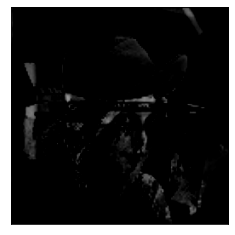

In [ ]:
res = cv2.subtract(lena, jet)
plt.imshow(res)
plt.xticks([]), plt.yticks([])  
plt.show()

Czy wynik odejmowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Często zamiast zwykłego odejmowania wykorzystuje się operację wartość bezwzględna z różnicy (pozwala to między innymi uniknąć pokazanych powyżej problemów).
Zamień typ obrazów _lena_ i _jet_ z uint8 na **int16**, odejmij je od siebie, a następnie wykorzystując funkcję `np.abs` wykonaj operację wartość bezwzględna z różnicy.
Wyświetl ten obraz.
Zastanów się, dlaczego ta zmiana poprawia wynik odejmowania?

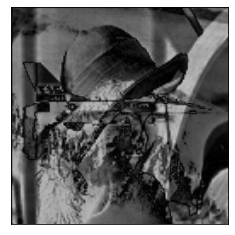

In [ ]:
res = cv2.subtract(lena.astype('int16'), jet.astype('int16'))
res = np.abs(res)
plt.imshow(res.astype('uint8'))
plt.xticks([]), plt.yticks([])  
plt.show()

### Mnożenie

Mnożenie dwóch obrazów pozwala wykonać funkcja `cv2.multiply`.
Wykonaj mnożenie obrazów _lena_ i _jet_.
Czy wynik takiej operacji zawiera jakąś istotną informację?
Dlaczego?

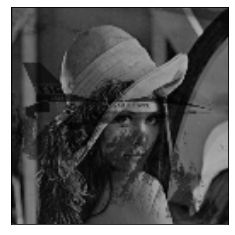

In [ ]:
res = cv2.multiply(lena.astype('float64'), jet.astype('float64'))
plt.imshow((res//255).astype('uint8'))
plt.xticks([]), plt.yticks([])  
plt.show()

Mnożenie częściej wykorzystuje się jako:
  + mnożenie przez stałą $-$ co powoduje ogólne rozjaśnienie albo ściemnienie obrazu,
  + mnożenie przez maskę $-$ czyli obraz binarny.

Wczytaj maskę _kolo.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp).
Przemnóż wybrany obraz przez maskę i wyświetl wynik.
Mnożenie przez maskę można zrealizować za pomocą funkcji `cv2.multiply`, ale maskę należy należy najpierw przekształcić z zakresu 0-255 do 0-1, na przykład `(maska).astype('bool').astype('uint8')`.

In [ ]:
!wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp

--2021-11-20 21:22:40--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66614 (65K) [image/bmp]
Saving to: ‘kolo.bmp’

kolo.bmp            100%[===================>]  65.05K  --.-KB/s    in 0.007s  

2021-11-20 21:22:40 (8.99 MB/s) - ‘kolo.bmp’ saved [66614/66614]



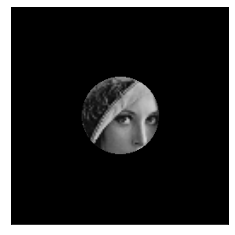

In [ ]:
mask = cv2.imread('kolo.bmp').astype('bool').astype('uint8')
res = cv2.multiply(lena, mask)
plt.imshow(res)
plt.xticks([]), plt.yticks([])  
plt.show()

### Negatyw

Negatyw obrazu uzyskuje się za pomocą funkcji `cv2.bitwise_not(img)`
Negatyw obrazu można również uzyskać wykorzystując przekodowanie LUT.
Można w tym celu posłużyć się przygotowaną wcześniej tablicą `lut.odwrotna`.
Przetestuj działanie tych funkcji i wykonaj negatyw obrazu _lena_ dowolnym sposobem.

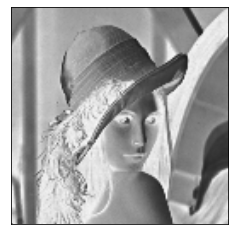

In [ ]:
res = cv2.bitwise_not(lena)
plt.imshow(res)
plt.xticks([]), plt.yticks([])  
plt.show()

## Operacje logiczne

Na poszczególnych punktach obrazu (najczęściej binarnego $-$ czyli składającego się z dwóch kolorów: czarnego i białego) można wykonywać operacje logiczne: NOT, AND, OR, XOR itp.
Wczytaj dwa obrazy: _kolo.bmp_ i _kwadrat.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp), następnie wyświetl je.

In [ ]:
!wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp

--2021-11-20 21:22:40--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66614 (65K) [image/bmp]
Saving to: ‘kwadrat.bmp’

kwadrat.bmp         100%[===================>]  65.05K  --.-KB/s    in 0.007s  

2021-11-20 21:22:40 (8.65 MB/s) - ‘kwadrat.bmp’ saved [66614/66614]



In [ ]:
kwadrat = cv2.imread('kwadrat.bmp')
kolo = cv2.imread('kolo.bmp')

Na wczytanych obrazach wykonaj wybrane operacje logiczne: NOT (operator `~`), AND (`&`), OR (`|`), XOR (`^`).
Operator `~` jest jednoargumentowy, wszystkie pozostałe są dwuargumentowe.
Alternatywnym sposobem jest wykorzystanie funkcji z biblioteki opencv: `cv2.bitwise_not`, `cv2.bitwise_and`, `cv2.bitwise_or`, `cv2.bitwise_xor`.
Wyświetl rezultaty.

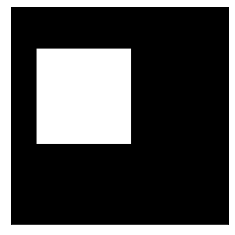

In [ ]:
plt.imshow(kwadrat)
plt.xticks([]), plt.yticks([])  
plt.show()

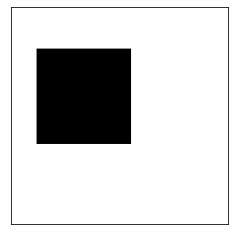

In [ ]:
res = cv2.bitwise_not(kwadrat)

plt.imshow(res)
plt.xticks([]), plt.yticks([])  
plt.show()

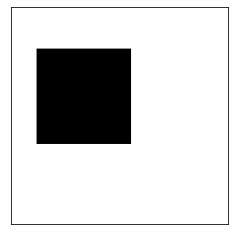

In [ ]:
res = cv2.bitwise_not(kwadrat)

plt.imshow(res)
plt.xticks([]), plt.yticks([])  
plt.show()

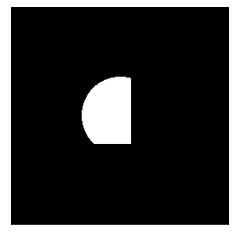

In [ ]:
res = cv2.bitwise_and(kwadrat, kolo)

plt.imshow(res)
plt.xticks([]), plt.yticks([])  
plt.show()

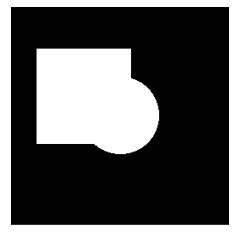

In [ ]:
res = cv2.bitwise_or(kwadrat, kolo)

plt.imshow(res)
plt.xticks([]), plt.yticks([])  
plt.show()

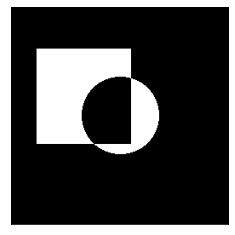

In [ ]:
res = cv2.bitwise_xor(kwadrat, kolo)

plt.imshow(res)
plt.xticks([]), plt.yticks([])  
plt.show()